# **Implementing XGBoost for the San Francisco Airbnb price prediction - Group_Project**

**Name and IDs:**

- **Lidia Yohannes Bereketeab  -  20029**

- **Feven Belay Araya    -       20027**

**All about XGBoost!**

XGBoost is like a super-smart tool for making predictions. It's used to figure out things like whether an email is spam or how much a house might cost. One cool thing about XGBoost is that it learns from its mistakes, so it gets better over time. It's really good at handling big problems with lots of data, and it's faster than many other tools.



**How it works:**

 It's all about using decision trees and something called gradient boosting. Decision trees are like a bunch of yes/no questions that help make predictions. XGBoost uses these trees to understand and predict stuff. But it's not just about the trees; it's also about learning from past mistakes and getting better with each prediction. That's where gradient boosting comes in. It's like a learning process where XGBoost figures out how to improve its predictions based on what it got wrong before. Plus, it has tricks to make sure it doesn't overthink things and stays focused. These tricks are called regularization features.

**Its applications:**

XGBoost is used in lots of different industries and for different types of problems. For example, it's used in classification problems, like figuring out if an email is spam or not. It's also used in regression, which is predicting numbers, like house prices. And it's even used in ranking, like recommending movies or products based on what you've liked before. So, whether you're in finance, healthcare, or e-commerce, XGBoost can help you make better predictions and decisions.






#**Business Understanding:**

The Airbnb Price Prediction project aims to leverage machine learning techniques to forecast the rental prices of properties listed on the Airbnb platform in San Francisco. This predictive model is essential for both hosts and guests alike. Hosts can benefit by setting competitive prices for their properties, maximizing occupancy rates, and optimizing their revenue. Guests, on the other hand, can make more informed decisions about accommodation choices based on predicted prices, ensuring they find suitable options within their budget. Understanding the factors influencing rental prices in San Francisco, such as property characteristics, location, amenities, and seasonal trends, is crucial for accurate predictions. By developing an effective price prediction model, this project seeks to enhance the overall Airbnb experience for both hosts and guests, contributing to a more efficient and transparent rental market in San Francisco.

#**Data Understanding:**

The dataset was obtained from Inside Airbnb, a platform that provides publicly available datasets related to Airbnb listings across various cities. Inside Airbnb collects and aggregates data from the Airbnb website to offer researchers, analysts, and enthusiasts access to detailed information about listings, hosts, and reviews. This dataset specifically focuses on Airbnb listings in San Francisco, offering valuable insights into the rental market dynamics, property characteristics, and host attributes in the city.

Link to dataset: https://insideairbnb.com/get-the-data/


The dataset comprises 8361 rows and 75 columns, each representing various attributes of Airbnb listings in San Francisco. These attributes encompass a wide range of information, including listing URLs, descriptions, host details, neighborhood insights, and review scores. Notable features include unique identifiers (id), textual descriptions (description, neighborhood_overview), host-related information (host_id, host_name), and review metrics (review_scores_rating, review_scores_accuracy). Additionally, details about property types, room configurations, accommodation capacity, and amenities are available. Understanding the structure and content of the dataset is crucial for preprocessing and feature selection to develop an effective price prediction model. Exploratory data analysis will be conducted to gain insights into the distribution of features, identify correlations, and assess missing values, ensuring the robustness and reliability of the predictive model.

In [154]:
!pip install category_encoders


In [155]:
import os, sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA, TruncatedSVD
from category_encoders.target_encoder import TargetEncoder
from category_encoders import LeaveOneOutEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

pd.options.mode.chained_assignment = None  # default='warn

**Loading Dataset**

In [156]:
df = pd.read_csv("/content/San_Francisco_listings.csv")

In [157]:
print(f"The dataset is composed of {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()


The dataset is composed of 8361 rows and 18 columns.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1094764,San Francisco Presidio Paradise!,172460,Leila,NaN,Inner Richmond,37.788140,-122.465470,Entire home/apt,150.0,30,1,2021-10-31,0.03,2,365,0,NaN
1,38047206,52 Vesta home,92965890,唱,NaN,Bayview,37.729800,-122.400960,Private room,NaN,90,0,NaN,NaN,1,0,0,NaN
2,43475468,Beautiful Mission District Home and Backyard,65136730,Ryan,NaN,Mission,37.757210,-122.412450,Entire home/apt,NaN,30,0,NaN,NaN,1,0,0,NaN
3,648549709021440854,LuxoStays | ! Quiet Rm #Private Bathrm & VIEW,226555948,Gi'Angelo,NaN,Excelsior,37.726761,-122.408522,Private room,69.0,30,6,2024-01-13,0.33,13,216,3,2022-003280STR
4,47918229,"Blueground | Marina District, w/d, nr parks",107434423,Blueground,NaN,Marina,37.803660,-122.445180,Entire home/apt,246.0,31,0,NaN,NaN,183,341,0,NaN


#**EDA - Exploratory Data Analysis**

In [158]:
# Check for duplicates
duplicates = df[df.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])

Number of duplicate rows: 0


In [159]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               8361
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             1587
minimum_nights                       0
number_of_reviews                    0
last_review                       2164
reviews_per_month                 2164
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2957
dtype: int64


**Observation:**


- Missing values:
  - neighbourhood_group: 8361 missing values
  - price: 1587 missing values
  - last_review and reviews_per_month: 2164 missing values each
  - license: 2957 missing values



In [160]:
# Check data types
print("Data types:\n", df.dtypes)

Data types:
 id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


In [161]:
# Define columns to drop
drop_columns = ['neighbourhood_group', 'id', 'host_id', 'number_of_reviews_ltm', 'license', 'last_review', 'name', 'host_name']

# Drop the columns in order
df.drop(columns=drop_columns, inplace=True)

# Display the modified DataFrame
print(df.head())


    neighbourhood   latitude   longitude        room_type  price  \
0  Inner Richmond  37.788140 -122.465470  Entire home/apt  150.0   
1         Bayview  37.729800 -122.400960     Private room    NaN   
2         Mission  37.757210 -122.412450  Entire home/apt    NaN   
3       Excelsior  37.726761 -122.408522     Private room   69.0   
4          Marina  37.803660 -122.445180  Entire home/apt  246.0   

   minimum_nights  number_of_reviews  reviews_per_month  \
0              30                  1               0.03   
1              90                  0                NaN   
2              30                  0                NaN   
3              30                  6               0.33   
4              31                  0                NaN   

   calculated_host_listings_count  availability_365  
0                               2               365  
1                               1                 0  
2                               1                 0  
3                   

**Reasons for dropping each column**

- 'neighbourhood_group': Not relevant for the analysis."
- 'id': Unique identifier, not needed for analysis."
- 'host_id': Identifier, not relevant for the analysis."
- 'number_of_reviews_ltm': Redundant, 'number_of_reviews' already covers this information."
- 'license': Not relevant for the analysis."
- 'last_review': Date information that is not used in the analysis."
- name of any kind doensnt make any difference in price

In [162]:
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Inner Richmond,37.788140,-122.465470,Entire home/apt,150.0,30,1,0.03,2,365
1,Bayview,37.729800,-122.400960,Private room,NaN,90,0,NaN,1,0
2,Mission,37.757210,-122.412450,Entire home/apt,NaN,30,0,NaN,1,0
3,Excelsior,37.726761,-122.408522,Private room,69.0,30,6,0.33,13,216
4,Marina,37.803660,-122.445180,Entire home/apt,246.0,31,0,NaN,183,341


# **Preprocessing**

**Handling missing values:**

It first calculates the median value for the 'price' column and fills the missing values in that column with this median value. Then, it fills missing values in the 'reviews_per_month' column with 0. Finally, it prints the sum of missing values for each column to verify that missing values have been handled.

In [163]:
# Importing necessary libraries
import pandas as pd

# Assuming 'df' is your DataFrame containing the data

# Impute missing values for 'price' with median
median_price = df['price'].median()
df['price'].fillna(median_price, inplace=True)

# Impute missing values for 'reviews_per_month' with 0
df['reviews_per_month'].fillna(0, inplace=True)

# Verify if missing values have been handled
print(df.isnull().sum())


neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


**General Box plot to check the outlier of each numerical features.**

In [164]:
df.describe()


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000
mean,37.770197,-122.429440,203.660687,19.854922,45.499940,0.914217,45.134912,177.172348
std,0.022881,0.026590,422.564185,47.812516,99.040692,1.618856,102.995608,133.999743
min,37.708480,-122.512460,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,37.755540,-122.440610,113.000000,2.000000,0.000000,0.000000,1.000000,44.000000
50%,37.776110,-122.421594,150.000000,3.000000,6.000000,0.250000,3.000000,177.000000
75%,37.788415,-122.411120,198.000000,30.000000,40.000000,1.060000,21.000000,301.000000
max,37.809810,-122.358480,25000.000000,1125.000000,1166.000000,34.690000,379.000000,365.000000


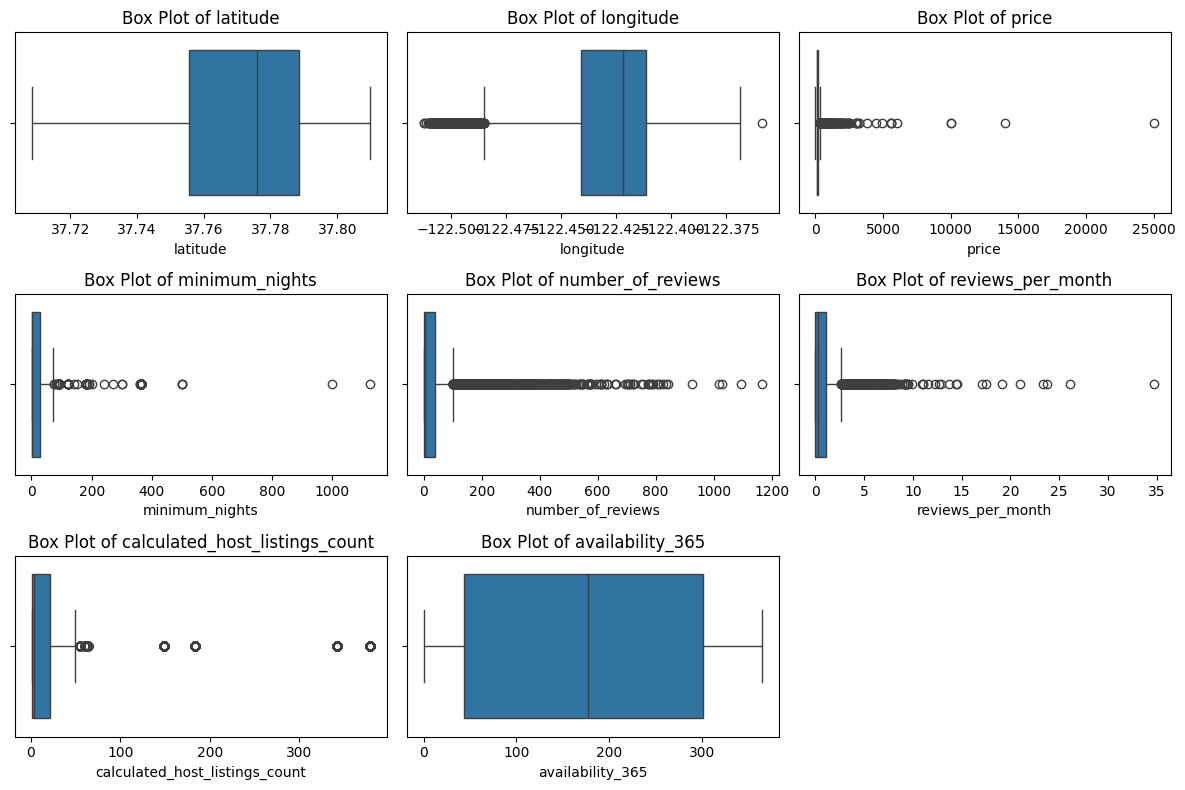

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the numerical features
numerical_features = ['latitude', 'longitude', 'price', 'minimum_nights',
                      'number_of_reviews', 'reviews_per_month',
                      'calculated_host_listings_count', 'availability_365']

# Create box plots for each numerical feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

**Outlier Handling**

By capping the outliers, the dataset's extreme values are reduced to more moderate values, which can help mitigate their impact on statistical analysis and modeling. This approach assumes that outliers are due to errors or extreme but legitimate values that should be treated as extreme values within the range of the fences.


1. Calculate Quartiles and Interquartile Range (IQR): For each numerical feature in the dataset, the first quartile (q1), third quartile (q3), and interquartile range (IQR) are calculated. The IQR is the difference between q3 and q1.

2. Define Upper and Lower Fences: The lower fence (fence_low) is set as q1 - 1.5 * IQR and the upper fence (fence_high) is set as q3 + 1.5 * IQR. These fences define the range within which most of the data points lie.

3. Replace Outliers: Any values in the numerical features that are below fence_low are replaced with fence_low, and any values above fence_high are replaced with fence_high. This effectively caps the values at the fences, hence the term "capping."

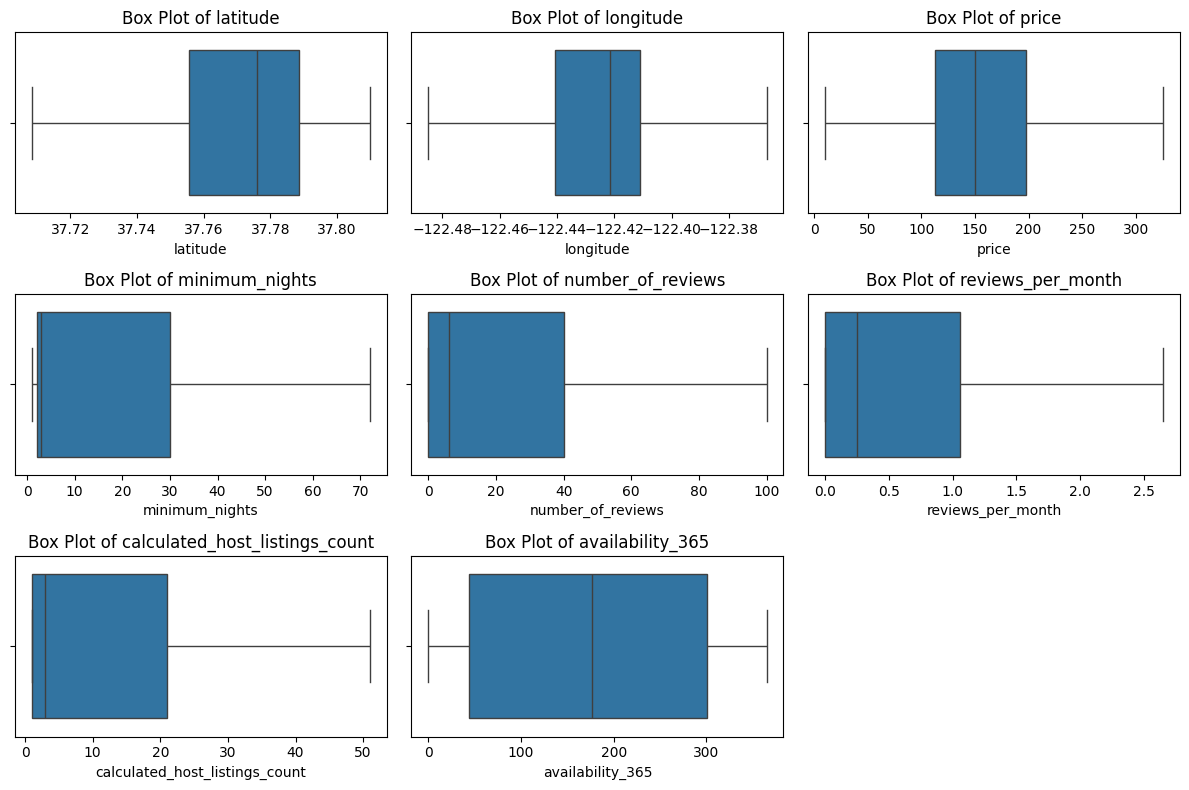

In [166]:
import numpy as np

# Define the numerical features
numerical_features = ['latitude', 'longitude', 'price', 'minimum_nights',
                      'number_of_reviews', 'reviews_per_month',
                      'calculated_host_listings_count', 'availability_365']

# Handling outliers - capping
for feature in numerical_features:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df[feature] = np.where(df[feature] > fence_high, fence_high, df[feature])
    df[feature] = np.where(df[feature] < fence_low, fence_low, df[feature])

# Verify if outliers have been handled
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


In [167]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000
mean,37.770197,-122.428707,164.691305,15.070805,25.948332,0.707155,13.529363,177.172348
std,0.022881,0.024748,77.751636,16.708649,36.093293,0.916389,18.494196,133.999743
min,37.708480,-122.484845,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,37.755540,-122.440610,113.000000,2.000000,0.000000,0.000000,1.000000,44.000000
50%,37.776110,-122.421594,150.000000,3.000000,6.000000,0.250000,3.000000,177.000000
75%,37.788415,-122.411120,198.000000,30.000000,40.000000,1.060000,21.000000,301.000000
max,37.809810,-122.366885,325.500000,72.000000,100.000000,2.650000,51.000000,365.000000


In [168]:
# Check for missing values again to confirm there are none
missing_values = df.isnull().sum()
missing_values

neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8361 entries, 0 to 8360
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   8361 non-null   object 
 1   latitude                        8361 non-null   float64
 2   longitude                       8361 non-null   float64
 3   room_type                       8361 non-null   object 
 4   price                           8361 non-null   float64
 5   minimum_nights                  8361 non-null   float64
 6   number_of_reviews               8361 non-null   float64
 7   reviews_per_month               8361 non-null   float64
 8   calculated_host_listings_count  8361 non-null   float64
 9   availability_365                8361 non-null   float64
dtypes: float64(8), object(2)
memory usage: 653.3+ KB


**General Visualazation to check the values of each feature Verses price**

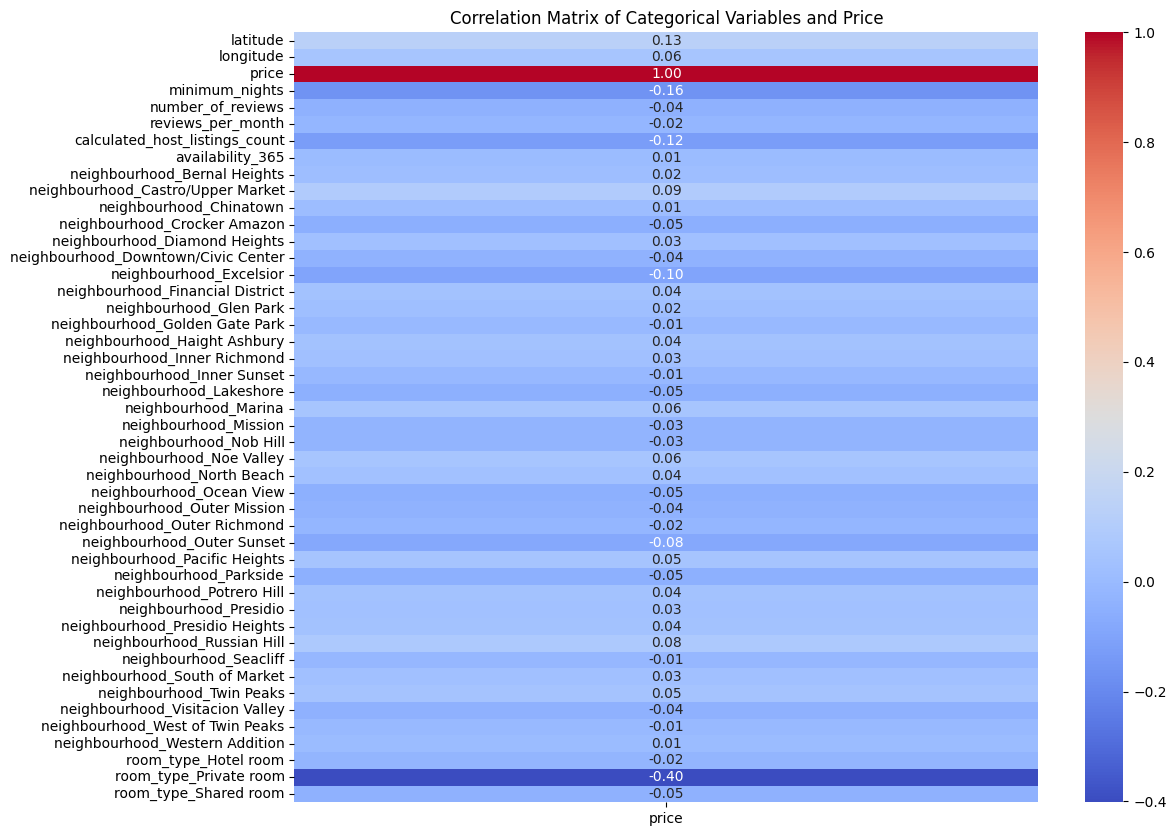

In [170]:
# One-hot encode the categorical variables
categorical_features = ['neighbourhood', 'room_type']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Compute the correlation matrix
correlation_matrix_categorical = df_encoded.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_categorical[['price']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Categorical Variables and Price')
plt.show()


**Observation:**

Based on the correlation coefficients between the categorical variables and the target variable 'price', we can draw the following conclusions:

**Strong Negative Correlations:**
- `room_type_Private room`: There is a strong negative correlation (-0.40) between the 'Private room' room type and the price. This suggests that listings for private rooms tend to have lower prices.

**Moderate Positive Correlations:**
- `neighbourhood_Russian Hill`: There is a moderate positive correlation (0.08) between the 'Russian Hill' neighbourhood and the price. This suggests that listings in the Russian Hill neighbourhood tend to have higher prices.

**Weak Correlations:**
- `latitude` and `longitude`: Both latitude (0.13) and longitude (0.06) have weak positive correlations with price, indicating a slight trend but not a strong relationship.
- `neighbourhood_Golden Gate Park`, `neighbourhood_West of Twin Peaks`, `neighbourhood_Western Addition`, and `availability_365` have very weak correlations with price, suggesting little to no relationship.

**No Significant Correlations:**
- Several neighbourhoods and the 'Hotel room' and 'Shared room' room types have correlations with price close to zero, indicating no significant relationship.




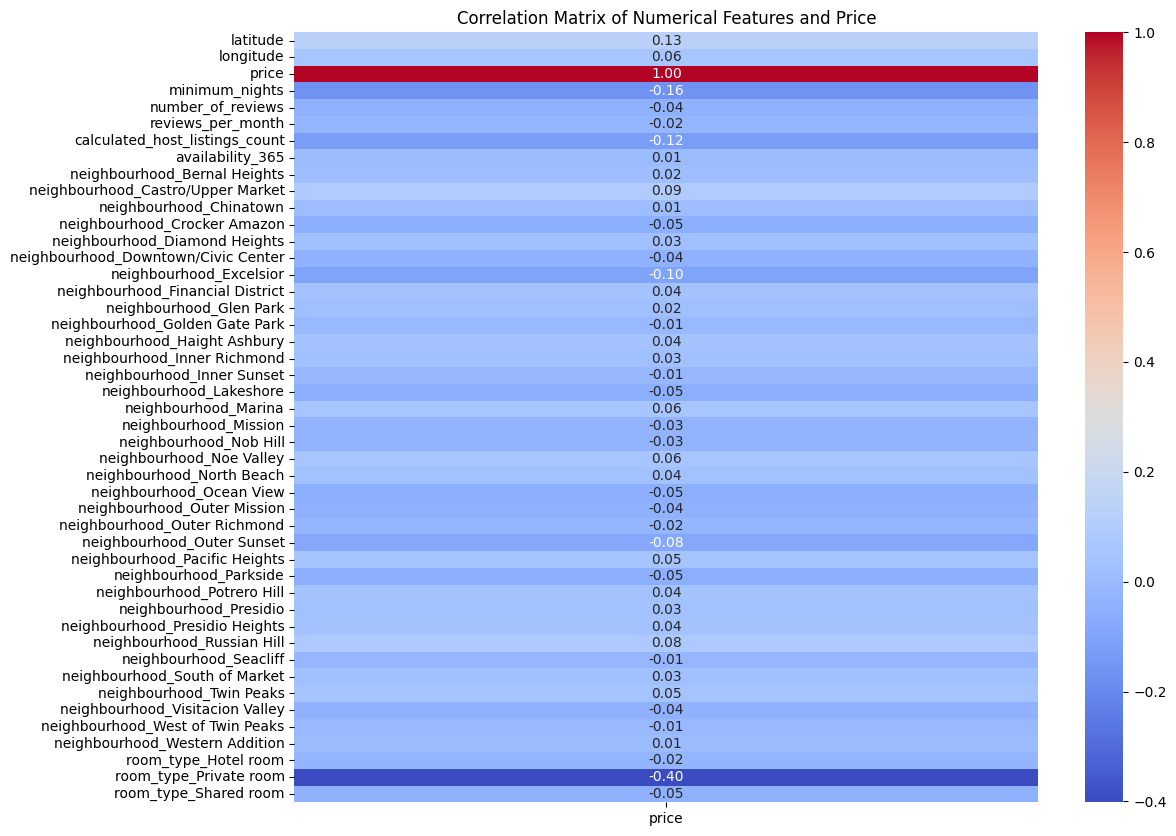

In [171]:
# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df, columns=['neighbourhood', 'room_type'], drop_first=True)

# Compute the correlation matrix between numerical features and price
correlation_matrix_numerical = df_encoded.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_numerical[['price']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Price')
plt.show()



**Observation:**

**Correlation of numerical variables with 'price':**
- **latitude**: The latitude has a positive correlation of approximately 0.13 with the price, suggesting a slight positive trend.
- **longitude**: The longitude has a positive correlation of approximately 0.06 with the price, indicating a weak positive relationship.
- **minimum_nights**: There is a negative correlation of approximately -0.16 between the minimum number of nights and the price, suggesting that listings with a higher minimum number of nights tend to have lower prices.
- **number_of_reviews**: The number of reviews has a negative correlation of approximately -0.04 with the price, indicating a weak negative relationship.
- **reviews_per_month**: There is a weak negative correlation of approximately -0.02 between the number of reviews per month and the price.
- **calculated_host_listings_count**: The calculated host listings count has a negative correlation of approximately -0.12 with the price, indicating a weak negative relationship.
- **availability_365**: There is a very weak positive correlation of approximately 0.01 between the availability in 365 days and the price.




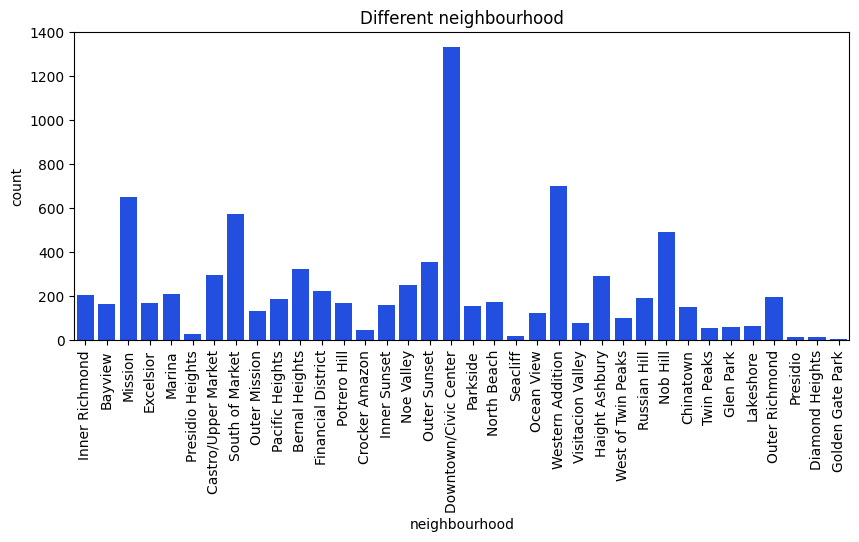

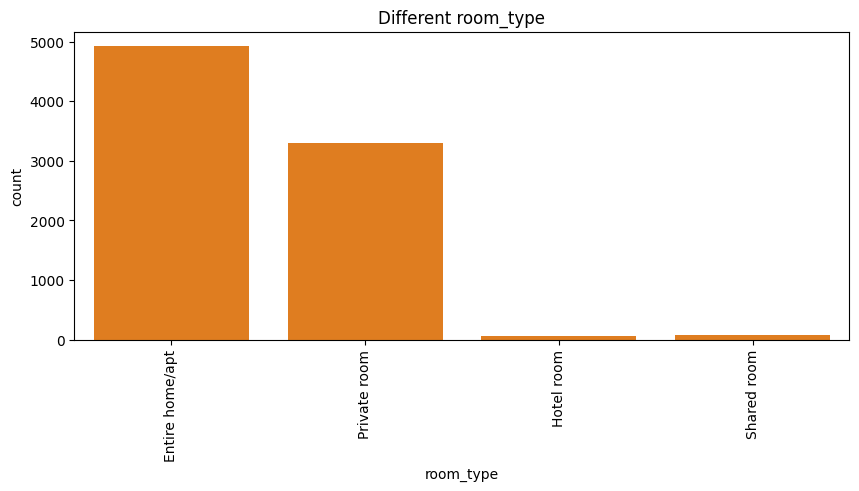

In [172]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
colors = sns.color_palette('bright', len(categorical_columns))

for col, color in zip(categorical_columns, colors):
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df, color=color)
    plt.title(f'Different {col}')
    plt.xticks(rotation=90)
    plt.show()


<Axes: xlabel='room_type', ylabel='price'>

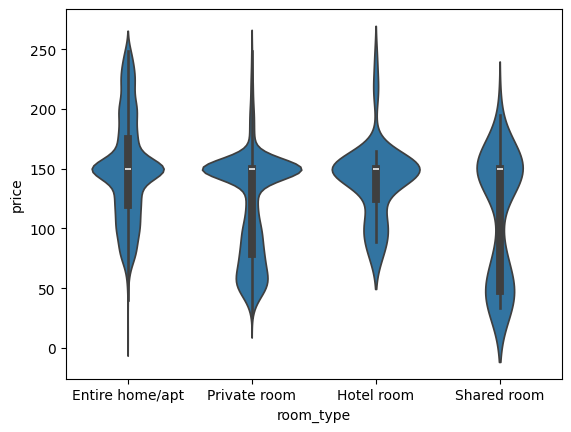

In [173]:
sns.violinplot(data=df[df.price < 250], x='room_type', y='price')

**General Analysis of the feature "neighbourhood" to check its value  on price
performing statistical tests to compare the average prices of listings across different neighborhoods in the dataset. The ANOVA test is used to compare means assuming data follows a normal distribution and has equal variances. The Kruskal-Wallis test is a non-parametric alternative to ANOVA for comparing medians when data does not meet ANOVA's assumptions.**

In [174]:
from scipy.stats import f_oneway

# Perform ANOVA test
neighbourhood_groups = df.groupby('neighbourhood')['price'].apply(list)
f_statistic, p_value = f_oneway(*neighbourhood_groups)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

from scipy.stats import kruskal

# Perform Kruskal-Wallis test
h_statistic, p_value = kruskal(*neighbourhood_groups)

print("H-statistic:", h_statistic)
print("P-value:", p_value)


F-statistic: 19.81835545276281
P-value: 5.834944734008895e-118
H-statistic: 661.4000205425813
P-value: 1.0939048659105793e-116


**Observation:**

1. The F-statistic for the ANOVA test is approximately 19.82, with a very low p-value (close to zero), indicating that there are significant differences in prices across different neighborhoods.

2. The H-statistic for the Kruskal-Wallis test is approximately 661.40, with a very low p-value (close to zero) as well, also indicating significant differences in prices across different neighborhoods.

**Encoding Catagorical Varaibles**

In [175]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode the 'neighbourhood' column
df['neighbourhood_encoded'] = label_encoder.fit_transform(df['neighbourhood'])

# Label encode the 'room_type' column
df['room_type_encoded'] = label_encoder.fit_transform(df['room_type'])

# Display the first few rows to verify the encoding
print(df[['neighbourhood', 'neighbourhood_encoded', 'room_type', 'room_type_encoded']].head())


    neighbourhood  neighbourhood_encoded        room_type  room_type_encoded
0  Inner Richmond                     12  Entire home/apt                  0
1         Bayview                      0     Private room                  2
2         Mission                     16  Entire home/apt                  0
3       Excelsior                      7     Private room                  2
4          Marina                     15  Entire home/apt                  0


**Observation**:

1. neighbourhood: The 'neighbourhood' column has been encoded into 'neighbourhood_encoded'. Each unique neighbourhood has been assigned a numerical label.
2. room_type: The 'room_type' column has been encoded into 'room_type_encoded'. Each unique room type ('Entire home/apt', 'Private room', 'Shared room') has been assigned a numerical label ('0', '1', '2').

In [176]:
# Select columns with numerical data types for traning purposes
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a new DataFrame containing only the numerical values
df_numerical = df[numerical_columns].copy()

# Display the first few rows of the new DataFrame
print(df_numerical.head())


    latitude   longitude  price  minimum_nights  number_of_reviews  \
0  37.788140 -122.465470  150.0            30.0                1.0   
1  37.729800 -122.400960  150.0            72.0                0.0   
2  37.757210 -122.412450  150.0            30.0                0.0   
3  37.726761 -122.408522   69.0            30.0                6.0   
4  37.803660 -122.445180  246.0            31.0                0.0   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.03                             2.0             365.0   
1               0.00                             1.0               0.0   
2               0.00                             1.0               0.0   
3               0.33                            13.0             216.0   
4               0.00                            51.0             341.0   

   neighbourhood_encoded  room_type_encoded  
0                     12                  0  
1                      0                  

In [177]:
df_numerical.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_encoded,room_type_encoded
0,37.788140,-122.465470,150.0,30.0,1.0,0.03,2.0,365.0,12,0
1,37.729800,-122.400960,150.0,72.0,0.0,0.00,1.0,0.0,0,2
2,37.757210,-122.412450,150.0,30.0,0.0,0.00,1.0,0.0,16,0
3,37.726761,-122.408522,69.0,30.0,6.0,0.33,13.0,216.0,7,2
4,37.803660,-122.445180,246.0,31.0,0.0,0.00,51.0,341.0,15,0


#**Model Implementation**

In [178]:
# Separating the features and target variable ('Price')
X = df_numerical.drop('price', axis=1)
y = df_numerical['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


# Model Training with Cross-Validation using Kfold
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
print(f"Cross-Validated MSE: {-np.mean(scores)}")

# Fit and evaluate the model
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

Cross-Validated MSE: 2847.991360893437
RMSE: 52.803866209973215


**Observation:**

The cross-validated mean squared error (MSE) is approximately 2847.99, and the root mean squared error (RMSE) on the test set is approximately 52.80.

These metrics indicate the average squared difference between the predicted and actual prices. Lower values indicate better performance, so the model's RMSE suggests it's making predictions with an average error of around $52.80.

**Implementing the XGBoost model for predicting laptop prices and evaluating model performance.**

In [180]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import GridSearchCV

#  Model Training with grid search
# Parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],  # Typical values range between 3 and 10
    'gamma': [0, 0.1, 0.01, 0.001],  # Equivalent to min_impurity_decrease
    'min_child_weight': [1, 2, 5, 10]  # Equivalent to min_samples_split for XGBoost
}

# Initialize the XGBoost regressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)

# Setup the grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best RMSE found: ", np.sqrt(-grid_search.best_score_))


Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best parameters found:  {'gamma': 0, 'max_depth': 7, 'min_child_weight': 5}
Best RMSE found:  53.046399604474686


**Observation:**

1. Grid Search Parameters: The grid search explored combinations of 'max_depth' (3, 5, 7, 9), 'gamma' (0, 0.1, 0.01, 0.001), and 'min_child_weight' (1, 2, 5, 10) to find the best hyperparameters for the XGBoost regressor.
2. Best Parameters: The best parameters found were 'gamma': 0, 'max_depth': 7, and 'min_child_weight': 5. This suggests that a deeper tree ('max_depth' of 7) and a higher 'min_child_weight' of 5 were optimal for this dataset, while 'gamma' had no regularization effect.
3. RMSE Comparison: The RMSE of approximately 53.05 from the grid search is slightly higher than the RMSE of approximately 52.80 from the initial XGBoost model. This difference could be due to the randomness in the train-test split and the small dataset size.
4. Implementation Insights:
The code demonstrates how to perform hyperparameter tuning using GridSearchCV to optimize an XGBoost model for better performance.
It shows the importance of tuning hyperparameters to improve model performance, although the improvement in this case was marginal.

In [181]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# Predict on testing data
y_pred = grid_search.predict(X_test)

# Evaluate the model using different metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

print(f"RMSE: {np.sqrt(mse)}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print(f"Explained Variance Score: {explained_variance}")


RMSE: 52.113997738141244
MSE: 2715.8687602509904
MAE: 35.75764747615069
R-squared: 0.5601256325329893
Explained Variance Score: 0.5602731303515618


# **Conclusion**

FinaL Analysis:

**Model Performance:**

1. RMSE: The Root Mean Squared Error (RMSE) of approximately 52.11 indicates that, on average, the model's predictions are off by around $52.11 when predicting Airbnb listing prices.
2. MSE: The Mean Squared Error (MSE) of approximately 2715.87 provides a measure of the average squared difference between the predicted and actual prices.
3. MAE: The Mean Absolute Error (MAE) of approximately 35.76 indicates the average absolute difference between the predicted and actual prices.
4. R-squared: The R-squared value of approximately 0.5601 suggests that the model explains approximately 56.01% of the variance in Airbnb listing prices.
5. Explained Variance Score: The Explained Variance Score of approximately 0.5603 indicates the proportion of the variance in Airbnb listing prices that is explained by the model.




In [182]:
import pandas as pd

# Create a DataFrame with actual and predicted prices
df_results = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price': y_pred})
df_results.head(10)  # Display the first 10 rows


,Actual Price,Predicted Price
0,48.0,46.705971
1,325.5,288.646301
2,60.0,52.231857
3,325.5,308.268555
4,150.0,181.482956
5,128.0,126.564972
6,58.0,74.529900
7,150.0,149.098419
8,325.5,296.696106
9,220.0,229.647247


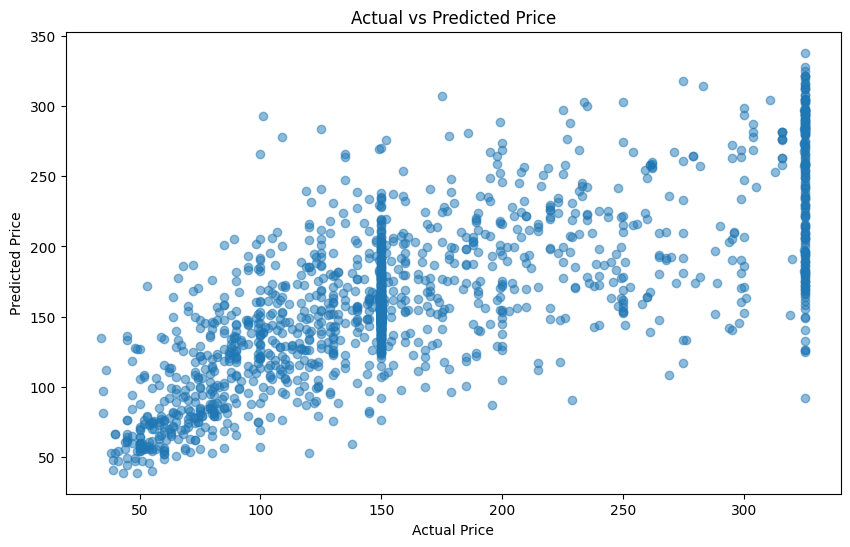

In [183]:
import matplotlib.pyplot as plt

# Plotting predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()


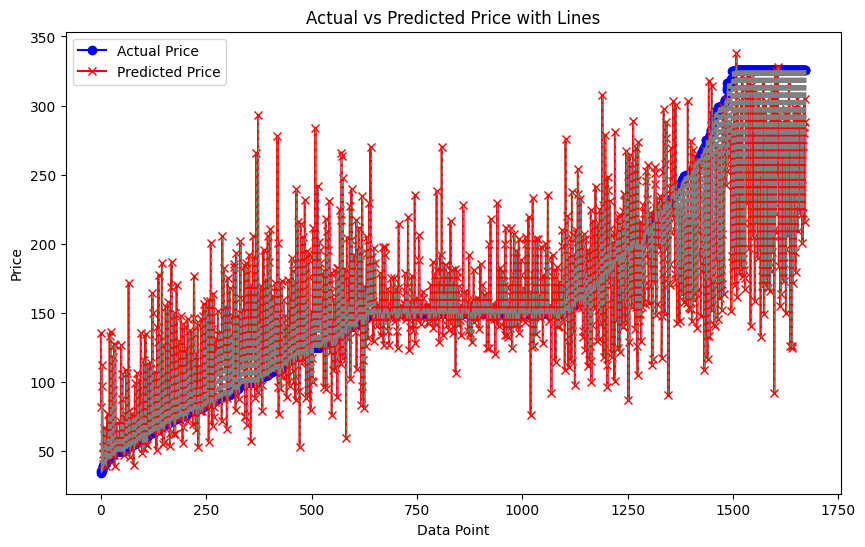

In [184]:
import matplotlib.pyplot as plt

# Sort the predicted and actual prices based on actual prices
sorted_indices = y_test.argsort()
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plotting predicted vs actual prices with lines
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test_sorted, label='Actual Price', color='blue', marker='o')
plt.plot(range(len(y_test)), y_pred_sorted, label='Predicted Price', color='red', marker='x')
for i in range(len(y_test)):
    plt.plot([i, i], [y_test_sorted.iloc[i], y_pred_sorted[i]], color='gray', linestyle='--', linewidth=1)
plt.xlabel('Data Point')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price with Lines')
plt.legend()
plt.show()


**Conclusion** :

Overall, the implementation of XGBoost for predicting Airbnb prices in San Francisco has shown promising results. The model's performance, as indicated by metrics such as RMSE, MSE, MAE, R-squared, and Explained Variance Score, suggests that it can predict prices with reasonable accuracy. While there is room for improvement, the model's ability to explain a significant portion of the variance in prices and make predictions close to the actual prices demonstrates its effectiveness. Further tuning and optimization could enhance the model's performance, making it a valuable tool for predicting Airbnb prices in San Francisco.